### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Importing Dataset & Basic Exploration

In [4]:
app = pd.read_csv('application_data.csv')
prev_app = pd.read_csv('previous_application.csv')
app_desc = pd.read_csv('columns_description.csv')

In [5]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
app_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


### Feature Selection

In [8]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
app.shape

(307511, 122)

In [10]:
msng_info = app.isnull().sum().sort_values().reset_index()
msng_info.rename(columns={'index':'col_name', 0:'null_count'},inplace=True)
msng_info

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0
5,REG_CITY_NOT_WORK_CITY,0
6,LIVE_CITY_NOT_WORK_CITY,0
7,ORGANIZATION_TYPE,0
8,FLAG_DOCUMENT_21,0
9,FLAG_DOCUMENT_20,0


In [11]:
msng_info['msng_pct']= (msng_info['null_count']/app.shape[0])*100
msng_info.to_excel('missing_info.xlsx',index=False)
msng_info.head()

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [12]:
msng_col = msng_info[msng_info['msng_pct']>=40]['col_name'].to_list()
len(msng_col)

49

In [13]:
app_msng_rmvd = app.drop(labels=msng_col,axis=1)
app_msng_rmvd.shape

(307511, 73)

In [14]:
flag_col = []

for col in app_msng_rmvd.columns:
    if col.startswith('FLAG_'):
        flag_col.append(col)
        
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [15]:
flag_tgt_col = app_msng_rmvd[flag_col+['TARGET']]
flag_tgt_col.shape

(307511, 29)

<AxesSubplot:xlabel='FLAG_DOCUMENT_19', ylabel='count'>

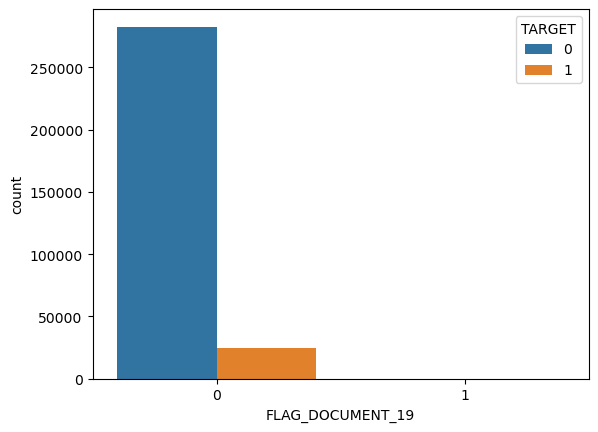

In [16]:
sns.countplot(data=flag_tgt_col,x='FLAG_DOCUMENT_19',hue='TARGET')

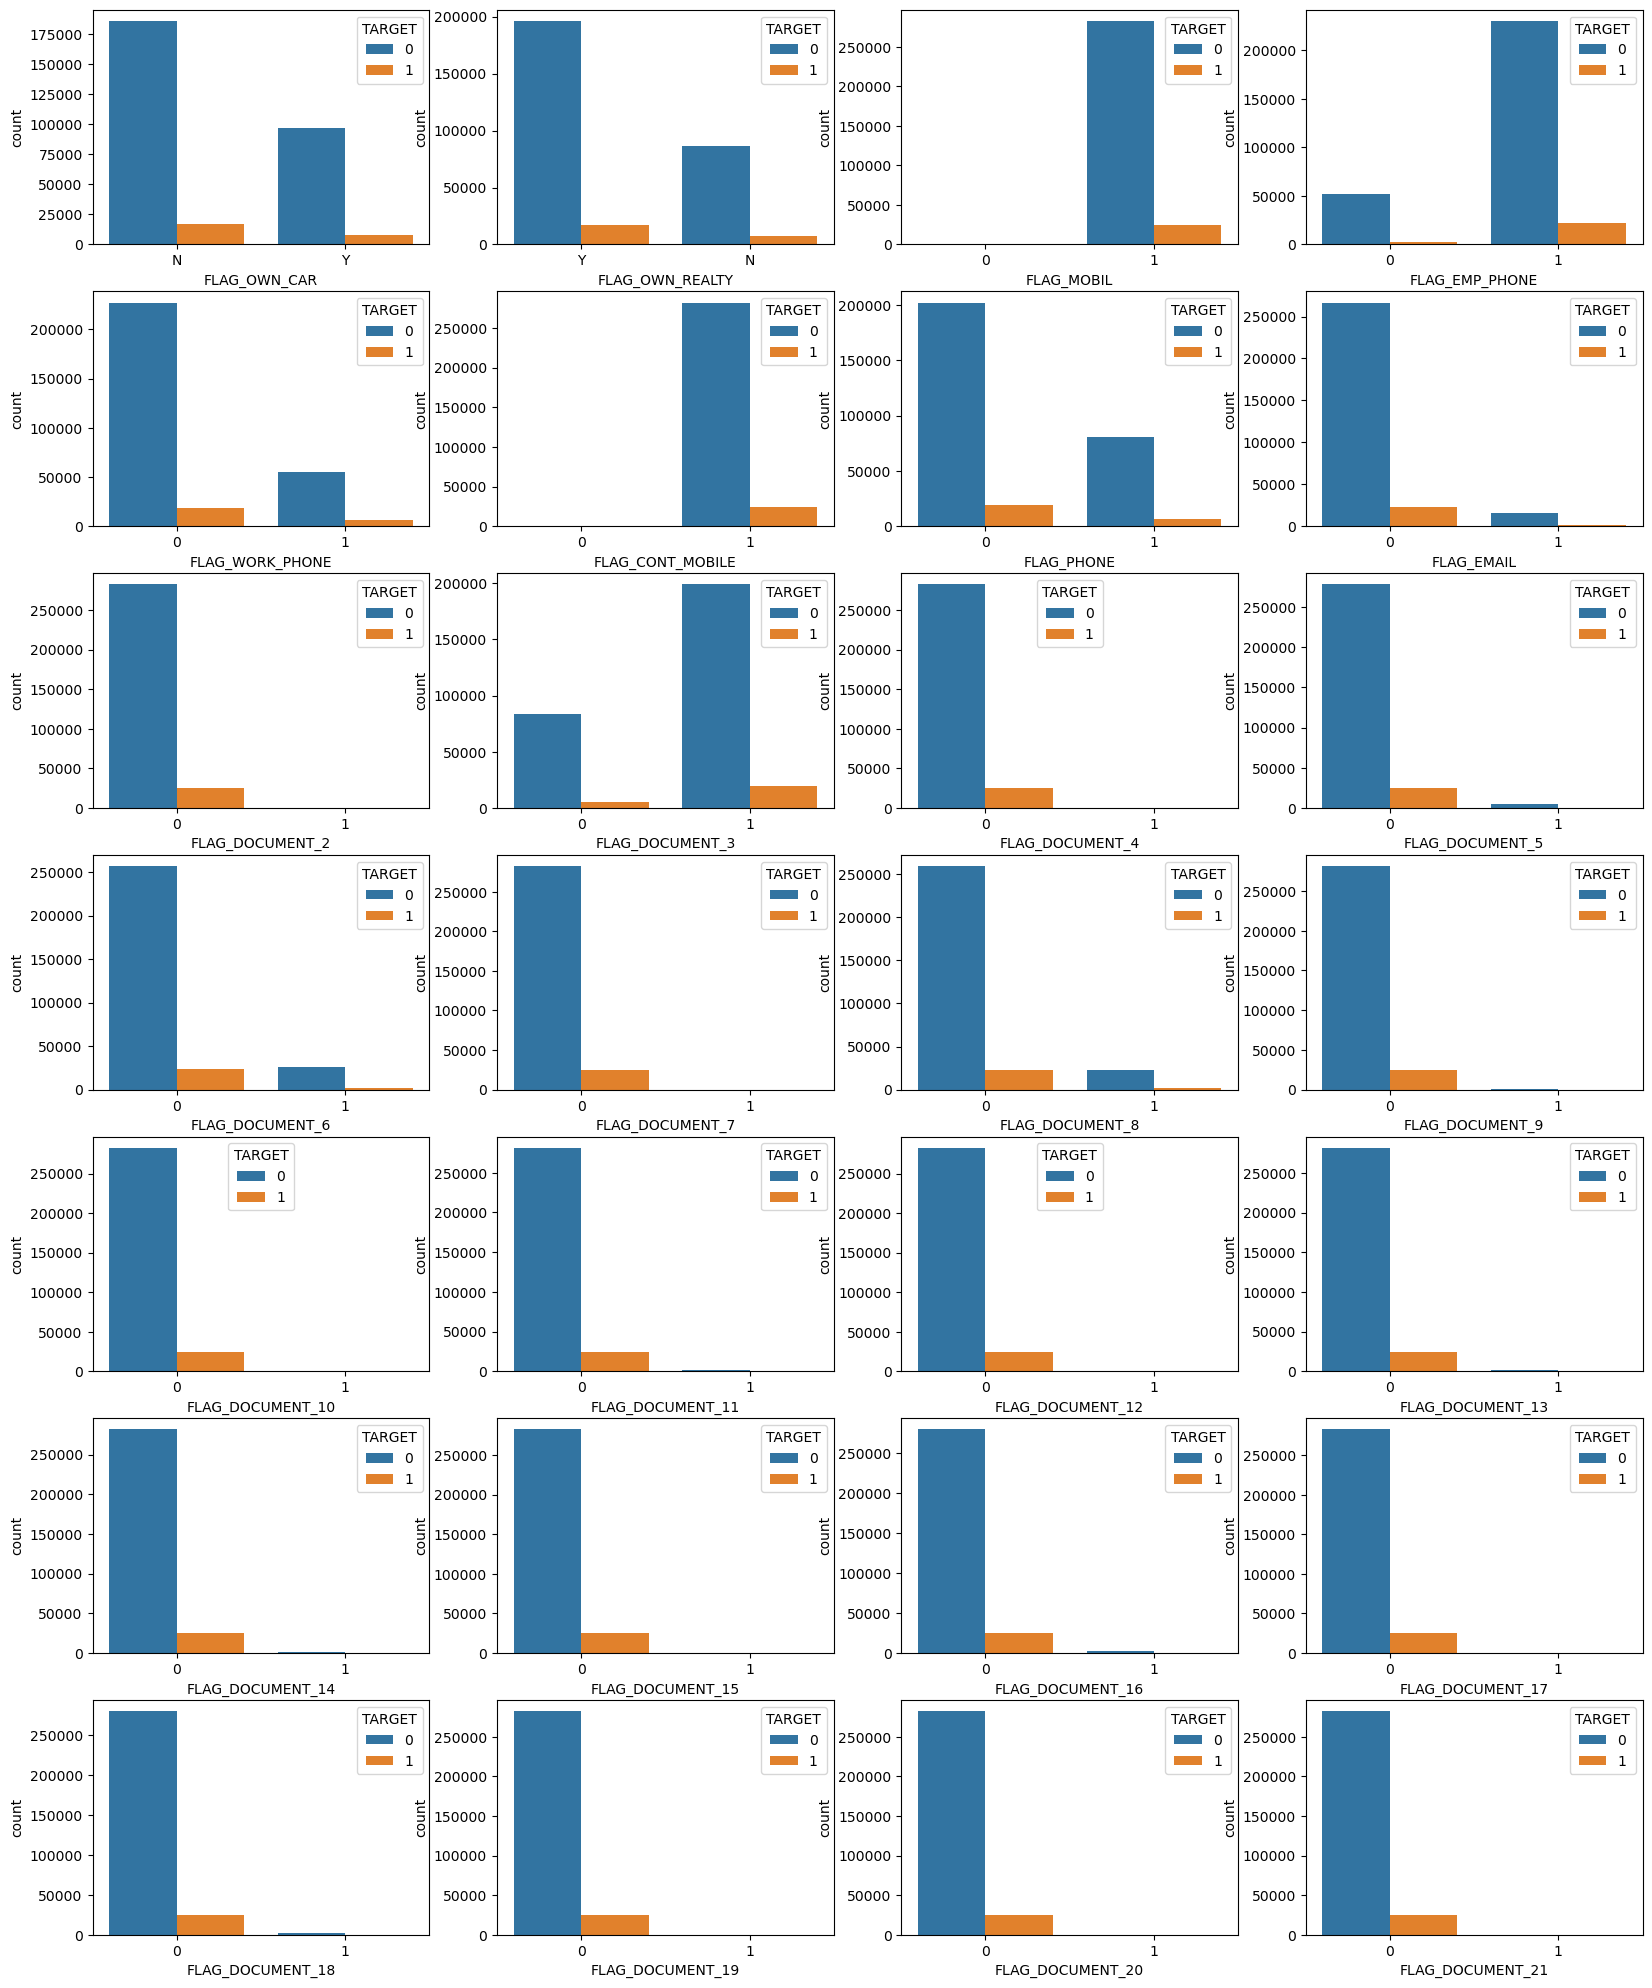

In [17]:
plt.figure(figsize=(20,25))
for i, col in enumerate(flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_tgt_col,x=col,hue='TARGET')

In [18]:
fig_corr =['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
         'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
flag_corr_df = app_msng_rmvd[fig_corr]
flag_corr_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0


In [19]:
flag_corr_df['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [20]:
flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

flag_corr_df['FLAG_OWN_CAR'].value_counts()

C:\Users\ruhit\AppData\Local\Temp\ipykernel_9036\2397861175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
C:\Users\ruhit\AppData\Local\Temp\ipykernel_9036\2397861175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64

In [21]:
corr_df = round(flag_corr_df.corr(),2)
corr_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_OWN_CAR,1.00,-0.00,-0.0,0.15,0.01,-0.01,-0.01,0.03,-0.02
FLAG_OWN_REALTY,-0.00,1.00,-0.0,-0.07,-0.11,0.01,-0.04,0.03,-0.01
FLAG_MOBIL,-0.00,-0.00,1.0,-0.00,0.00,-0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,0.15,-0.07,-0.0,1.00,0.23,-0.01,-0.02,0.06,0.05
FLAG_WORK_PHONE,0.01,-0.11,0.0,0.23,1.00,0.02,0.29,-0.01,0.03
FLAG_CONT_MOBILE,-0.01,0.01,-0.0,-0.01,0.02,1.00,0.01,-0.01,0.00
FLAG_PHONE,-0.01,-0.04,0.0,-0.02,0.29,0.01,1.00,0.01,-0.02
FLAG_EMAIL,0.03,0.03,0.0,0.06,-0.01,-0.01,0.01,1.00,-0.00
TARGET,-0.02,-0.01,0.0,0.05,0.03,0.00,-0.02,-0.00,1.00


<AxesSubplot:>

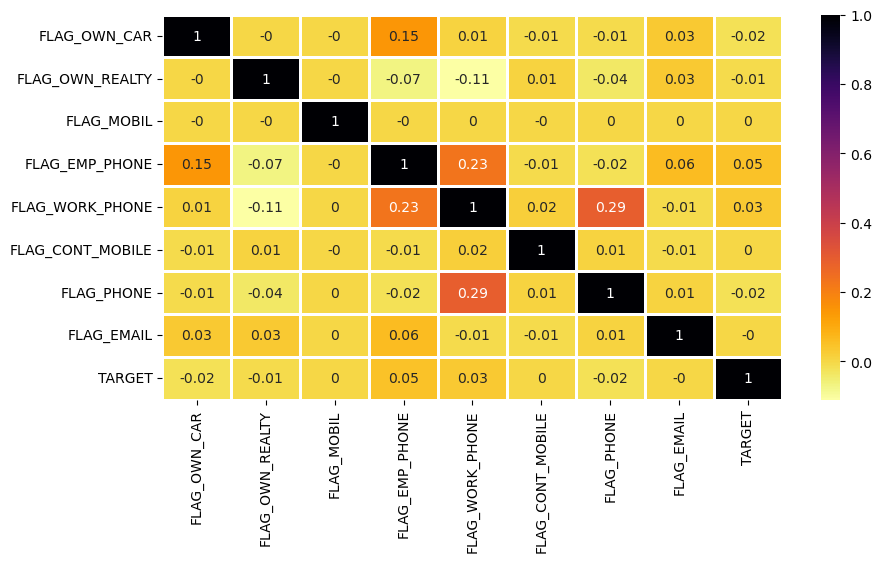

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,cmap='inferno_r',linewidth=2,annot=True)

In [23]:
app_flag_rmvd = app_msng_rmvd.drop(labels=flag_col,axis=1)

app_flag_rmvd.shape

(307511, 45)

In [24]:
app_flag_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
corr_df2 = round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2)
corr_df2

,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_2,1.00,0.11,-0.16
EXT_SOURCE_3,0.11,1.00,-0.18
TARGET,-0.16,-0.18,1.00


<AxesSubplot:>

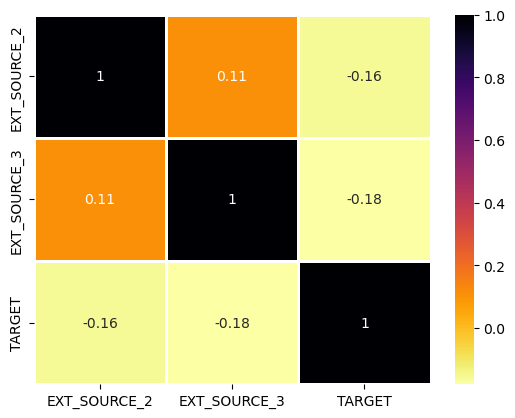

In [26]:
sns.heatmap(corr_df2,cmap='inferno_r',linewidth=2,annot=True)

In [27]:
app_ext_rmvd = app_flag_rmvd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
app_ext_rmvd.shape

(307511, 43)

## Feature Engineering



In [28]:
(app_ext_rmvd.isnull().sum().sort_values()/app_ext_rmvd.shape[0])*100

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_RATING_CLIENT            0.000000
NAME_HOUSING_TYPE               0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_POPULATION_RELATIVE      0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
CODE_GENDER                     0.000000
NAME_INCOME_TYPE

### Missing Values Imputation

In [29]:
app_ext_rmvd['CNT_FAM_MEMBERS']= app_ext_rmvd['CNT_FAM_MEMBERS'].fillna(app_ext_rmvd['CNT_FAM_MEMBERS'].mode()[0])
app_ext_rmvd['CNT_FAM_MEMBERS'].isnull().sum()

0

In [30]:
app_ext_rmvd['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [31]:
app_ext_rmvd['OCCUPATION_TYPE']= app_ext_rmvd['OCCUPATION_TYPE'].fillna(app_ext_rmvd['OCCUPATION_TYPE'].mode()[0])
app_ext_rmvd['OCCUPATION_TYPE'].isnull().sum()

0

In [32]:
app_ext_rmvd['OCCUPATION_TYPE'].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [33]:
app_ext_rmvd['NAME_TYPE_SUITE'].isnull().sum()

1292

In [34]:
app_ext_rmvd['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [35]:
app_ext_rmvd['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [36]:
app_ext_rmvd['NAME_TYPE_SUITE']= app_ext_rmvd['NAME_TYPE_SUITE'].fillna(app_ext_rmvd['NAME_TYPE_SUITE'].mode()[0])
app_ext_rmvd['NAME_TYPE_SUITE'].isnull().sum()

0

In [37]:
app_ext_rmvd['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [38]:
app_ext_rmvd['AMT_ANNUITY'] = app_ext_rmvd['AMT_ANNUITY'].fillna(app_ext_rmvd['AMT_ANNUITY'].mean())
app_ext_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [39]:
app_ext_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [40]:
amt_req_col = []
for col in app_ext_rmvd.columns:
    if col.startswith('AMT_REQ_CREDIT_BUREAU'):
        amt_req_col.append(col)
        
amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [41]:
for col in amt_req_col:
    app_ext_rmvd[col] = app_ext_rmvd[col].fillna(app_ext_rmvd[col].median())

In [42]:
app_ext_rmvd.isnull().sum().sort_values()

SK_ID_CURR                        0
AMT_REQ_CREDIT_BUREAU_QRT         0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
CNT_FAM_MEMBERS                   0
OCCUPATION_TYPE                   0
REGION_RATING_CLIENT              0
DAYS_REGISTRATION                 0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
DAYS_ID_PUBLISH                   0
AMT_ANNUITY                       0
AMT_CREDIT                  

In [43]:
app_ext_rmvd['AMT_GOODS_PRICE'].isnull().sum()

278

In [44]:
app_ext_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [45]:
app_ext_rmvd['AMT_GOODS_PRICE'] = app_ext_rmvd['AMT_GOODS_PRICE'].fillna(app_ext_rmvd['AMT_GOODS_PRICE'].median())

In [46]:
app_ext_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

### Value Modification

In [47]:
days_col=[]
for col in app_ext_rmvd.columns:
    if col.startswith('DAYS'):
        days_col.append(col)

In [48]:
for col in days_col:
    app_ext_rmvd[col]= abs(app_ext_rmvd[col])

In [49]:
app_ext_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
app_ext_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [51]:
app_ext_rmvd.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

### Outlier Detection and Treatment 

In [52]:
app_ext_rmvd['AMT_GOODS_PRICE'].agg(['min','mean','max','median'])

min       4.050000e+04
mean      5.383163e+05
max       4.050000e+06
median    4.500000e+05
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

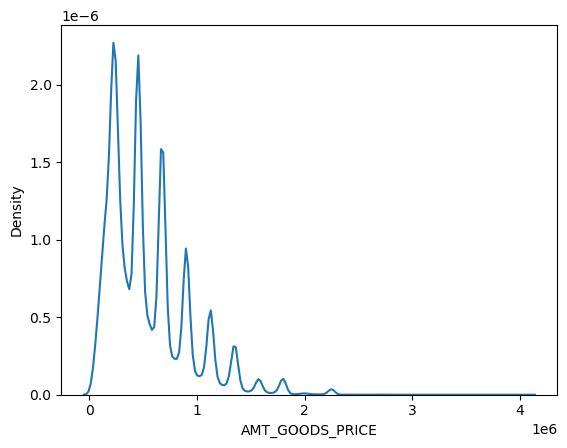

In [53]:
sns.kdeplot(data=app_ext_rmvd,x='AMT_GOODS_PRICE')

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Count'>

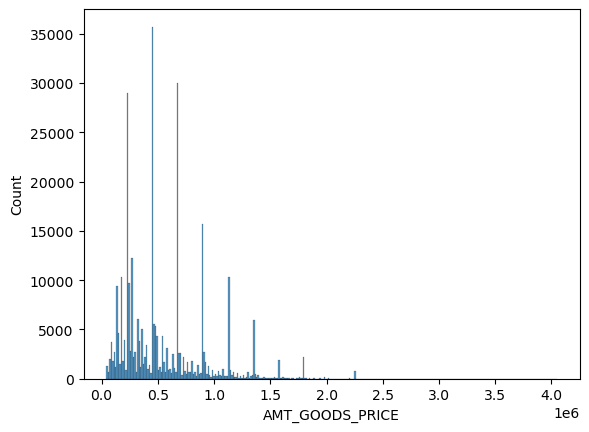

In [54]:
sns.histplot(data=app_ext_rmvd,x='AMT_GOODS_PRICE')

### Binning the Variables

In [55]:
app_ext_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [56]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100K-200K','200-300K','300-400K','400-500K','500-600K','600-700K','700-800K','800-900K','Above 900K']
app_ext_rmvd['AMT_GOODS_PRICE_range'] = pd.cut(app_ext_rmvd['AMT_GOODS_PRICE'],bins,labels=ranges)

In [57]:
app_ext_rmvd['AMT_GOODS_PRICE_range'].value_counts()

200-300K      62761
400-500K      57251
Above 900K    41880
600-700K      40024
100K-200K     32956
800-900K      21484
300-400K      21219
500-600K      13117
0-100K         8709
700-800K       8110
Name: AMT_GOODS_PRICE_range, dtype: int64

In [58]:
app_ext_rmvd['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])


0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [59]:
app_ext_rmvd['AMT_INCOME_TOTAL'].max()

117000000.0

In [60]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

app_ext_rmvd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_ext_rmvd['AMT_INCOME_TOTAL'],bins,labels=ranges)


In [61]:
app_ext_rmvd['AMT_INCOME_TOTAL_RANGE'].value_counts()

100K-150K     91591
150K-200K     64307
0-100K        63698
200K-250K     48137
250K-300K     17039
300K-350K      8874
Above 400K     8063
350K-400K      5802
Name: AMT_INCOME_TOTAL_RANGE, dtype: int64

In [62]:
app_ext_rmvd['AMT_INCOME_TOTAL_RANGE'].isnull().sum()

0

In [63]:
app_ext_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [64]:
app_ext_rmvd['AMT_CREDIT'].max()

4050000.0

In [65]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

app_ext_rmvd['AMT_CREDIT_RANGE'] = pd.cut(app_ext_rmvd['AMT_CREDIT'],bins,labels=ranges)

In [66]:
app_ext_rmvd['AMT_CREDIT_RANGE'].value_counts()

200K-400K    81151
400K-600K    66270
1M-2M        47956
600K-800K    43242
0-200K       36144
800K-900K    21792
900K-1M       8927
2M-3M         1997
Above 3M        32
Name: AMT_CREDIT_RANGE, dtype: int64

In [67]:
app_ext_rmvd['AMT_CREDIT'].isnull().sum()

0

In [68]:
app_ext_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [69]:
app_ext_rmvd['AMT_ANNUITY'].max()

258025.5

In [70]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

app_ext_rmvd['AMT_ANNUITY_RANGE'] = pd.cut(app_ext_rmvd['AMT_ANNUITY'],bins,labels=ranges)


In [71]:
app_ext_rmvd['AMT_ANNUITY_RANGE'].value_counts()

0-25K         154867
25K-50K       131347
50K-100K       20792
100K-150K        437
Above 200K        36
150K-200K         32
Name: AMT_ANNUITY_RANGE, dtype: int64

In [72]:
app_ext_rmvd['AMT_ANNUITY_RANGE'].isnull().sum()

0

In [73]:
app_ext_rmvd['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [74]:
app_ext_rmvd['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])


0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.81     10913.1
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [75]:
app_ext_rmvd[app_ext_rmvd['DAYS_EMPLOYED']<app_ext_rmvd['DAYS_EMPLOYED'].max()].max()['DAYS_EMPLOYED']

17912

In [76]:
app_ext_rmvd['DAYS_EMPLOYED'].max()

365243

In [77]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

app_ext_rmvd['DAYS_EMPLOYED_RANGE'] = pd.cut(app_ext_rmvd['DAYS_EMPLOYED'],bins,labels=ranges)

In [78]:
app_ext_rmvd['DAYS_EMPLOYED_RANGE'].value_counts()

0-5Y         136309
5Y-10Y        64872
Above 65Y     55374
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
50Y-65Y           0
Name: DAYS_EMPLOYED_RANGE, dtype: int64

In [79]:
app_ext_rmvd['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])


0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.81    20641.0
0.85    21316.0
0.90    22181.0
0.95    23204.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [80]:
app_ext_rmvd['DAYS_BIRTH'].min()

7489

In [81]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

app_ext_rmvd['DAYS_BIRTH_RANGE'] = pd.cut(app_ext_rmvd['DAYS_BIRTH'],bins,labels=ranges)

In [82]:
app_ext_rmvd['DAYS_BIRTH_RANGE'].value_counts()

30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
20Y-30Y      45021
Above 60Y    35579
20Y              0
Name: DAYS_BIRTH_RANGE, dtype: int64

In [83]:
app_ext_rmvd['DAYS_BIRTH'].isnull().sum()

0

## Analysing the Data 

In [84]:
app_ext_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [85]:
obj_var = app_ext_rmvd.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [86]:
app_ext_rmvd['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

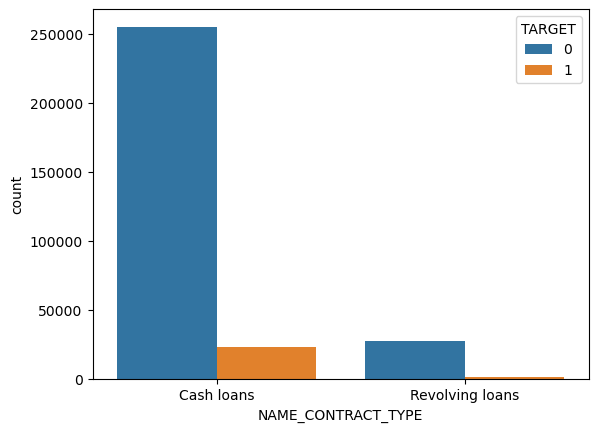

In [87]:
sns.countplot(data=app_ext_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [88]:
data_pct = app_ext_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
data_pct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [89]:
data_pct['pct'] = data_pct['TARGET']*100
data_pct

,NAME_CONTRACT_TYPE,TARGET,pct
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='pct'>

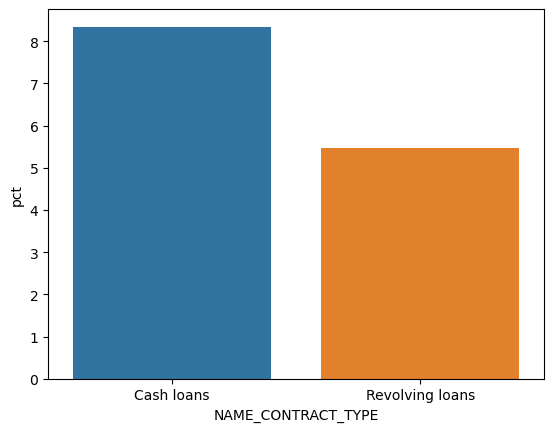

In [90]:
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='pct')

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='pct'>

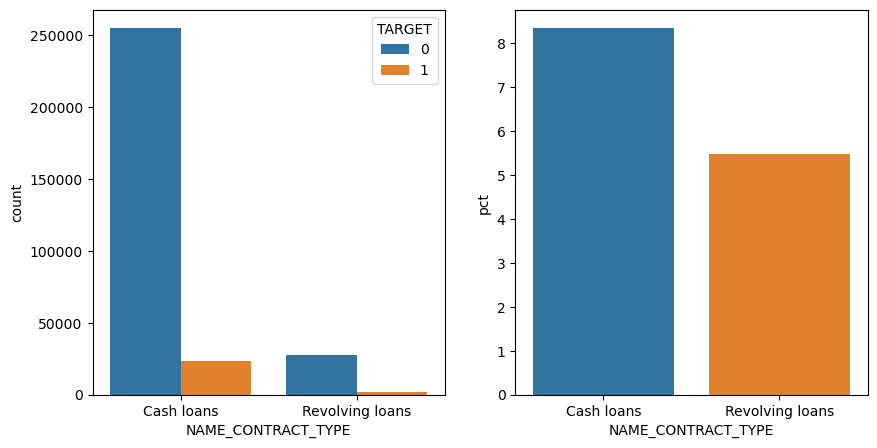

In [91]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_ext_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='pct')

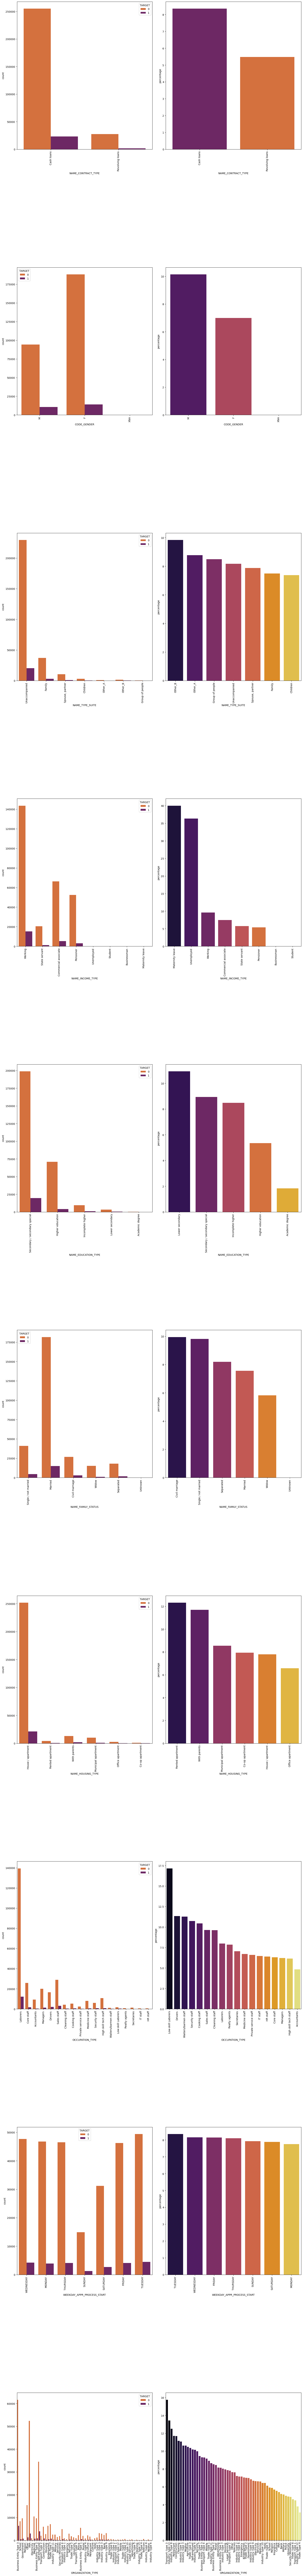

In [92]:

plt.figure(figsize=(20,180))

for i,var in enumerate(obj_var):

    data_pct = app_ext_rmvd[[var,'TARGET']].groupby([var],as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['percentage'] = data_pct['TARGET']*100


    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=0.8)
    sns.countplot(data=app_ext_rmvd,x=var,hue='TARGET',palette='inferno_r')
    plt.xticks(rotation=90)
    
    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='percentage',palette='inferno')
    plt.xticks(rotation=90)

In [93]:
num_var = app_ext_rmvd.select_dtypes(include=['float64','int64']).columns
num_var = app_ext_rmvd.select_dtypes(include=['float64','int64','category']).columns

In [94]:
num_data = app_ext_rmvd[num_var]
defaulters= num_data[num_data['TARGET']==1]
repayers=num_data[num_data['TARGET']==0].drop('TARGET',axis=1)

In [95]:
num_data.head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_range,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300-400K,200K-250K,400K-600K,0-25K,0-5Y,20Y-30Y
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100K-200K,0-100K,0-200K,0-25K,0-5Y,50Y-60Y
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,200-300K,100K-150K,200K-400K,25K-50K,5Y-10Y,50Y-60Y
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,500-600K,100K-150K,400K-600K,0-25K,5Y-10Y,50Y-60Y
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,477,2.0,2,2,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,400-500K,0-100K,400K-600K,25K-50K,0-5Y,40Y-50Y
6,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,13778,3130,1213.0,619,3.0,2,2,16,0,0,0,0,0,0,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,1.0,1.0,2.0,Above 900K,150K-200K,1M-2M,25K-50K,5Y-10Y,30Y-40Y
7,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,18850,449,4597.0,2379,2.0,3,3,16,0,0,0,0,1,1,2.0,0.0,2.0,0.0,1070.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,350K-400K,1M-2M,25K-50K,0-5Y,50Y-60Y
8,100011,0,0,112500.0,1019610.0,33826.5,913500.0,0.018634,20099,365243,7427.0,3514,2.0,2,2,14,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Above 900K,100K-150K,1M-2M,25K-50K,Above 65Y,50Y-60Y
9,100012,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,14469,2019,14437.0,3992,1.0,2,2,8,0,0,0,0,0,0,2.0,0.0,2.0,0.0,1673.0,0.0,0.0,0.0,0.0,0.0,1.0,400-500K,100K-150K,400K-600K,0-25K,5Y-10Y,30Y-40Y


In [96]:
defaulters.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_range,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300-400K,200K-250K,400K-600K,0-25K,0-5Y,20Y-30Y
26,100031,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,1827,1.0,3,2,9,0,0,0,0,0,0,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,700-800K,100K-150K,900K-1M,25K-50K,5Y-10Y,50Y-60Y
40,100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,1029,2.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,800-900K,200K-250K,1M-2M,25K-50K,0-5Y,40Y-50Y
42,100049,1,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,45.0,4409,2.0,3,3,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,200-300K,100K-150K,200K-400K,0-25K,5Y-10Y,30Y-40Y
81,100096,1,0,81000.0,252000.0,14593.5,252000.0,0.028663,24794,365243,5391.0,4199,2.0,2,2,10,0,0,0,0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200-300K,0-100K,200K-400K,0-25K,Above 65Y,Above 60Y


In [97]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.005144,-0.010165
CNT_CHILDREN,-0.005144,1.000000,0.004796
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000


In [98]:
defaulters_corr = defaulters.corr()
defaulters_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.006301,0.001254,-0.005161,-0.006342,0.002539,-0.003816,-0.005936,-0.004135,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,-0.009395,-0.005549,-0.009058,-0.009428,-0.002455,-0.011106,-0.007388,-0.003075,0.005180,-0.001614,0.006843
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008111,-0.031975,-0.259109,-0.192864,-0.149154,0.032299,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,0.025804,0.001448,0.025180,-0.005106,-0.011547,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037591,0.009135,-0.003096,-0.014977,-0.000158,0.004215,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,-0.004709,-0.005186,-0.004616,-0.004866,0.002429,0.001079,0.000135,0.000941,0.005718,0.001037,0.004516
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.982783,0.069161,0.135316,0.001930,0.025854,0.052329,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.019098,-0.025979,0.019487,-0.030880,0.110851,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698
AMT_ANNUITY,-0.007578,NaN,0.031257,0.046421,0.752195,1.000000,0.752295,0.071690,0.014303,-0.081207,-0.034279,0.016767,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.004463,-0.022394,0.005500,-0.027495,0.079870,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819
AMT_GOODS_PRICE,-0.001814,NaN,-0.008111,0.037591,0.982783,0.752295,1.000000,0.076053,0.135738,0.006648,0.025661,0.056061,0.047367,-0.066367,-0.077170,0.044302,0.022406,0.036285,0.035505,-0.034085,-0.038915,-0.016703,0.019892,-0.021781,0.020366,-0.026175,0.118232,-0.002451,0.005457,0.010793,0.059112,-0.006114,-0.022811
REGION_POPULATION_RELATIVE,0.006301,NaN,-0.031975,0.009135,0.069161,0.071690,0.076053,1.000000,0.048190,0.015532,0.056222,0.015537,-0.030163,-0.443236,-0.446977,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.006224,0.025865,0.006793,0.018231,0.055139,-0.000710,-0.004546,0.003485,0.065248,-0.004433,0.003198
DAYS_BIRTH,0.001254,NaN,-0.259109,-0.003096,0.135316,0.014303,0.135738,0.048190,1.000000,0.582185,0.289114,0.252863,-0.203267,-0.033928,-0.033631,-0.062172,-0.054654,-0.069564,-0.045517,-0.161858,-0.215192,-0.123623,0.005164,-0.004946,0.005391,-0.004001,0.111199,-0.011650,0.007956,0.008244,0.010923,0.022904,0.083838
DAYS_EMPLOYED,-0.005161,NaN,-0.192864,-0.014977,0.001930,-0.081207,0.006648,0.015532,0.582185,1.000000,0.192455,0.229090,-0.186515,0.003490,0.002888,-0.060000,-0.035025,-0.091145,-0.078787,-0.088177,-0.245827,-0.198484,-0.008019,0.003191,-0.008305,0.005391,0.001402,-0.007307,0.019381,0.013237,-0.023088,0.012230,0.030812


In [99]:
defaulters_corr_unstacked = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1',
                                                                                                                      'level_1':'var2',
                                                                                                                      0:'corr'})

defaulters_corr_unstacked['corr'] = abs(defaulters_corr_unstacked['corr'])


defaulters_corr_unstacked.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

,var1,var2,corr
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
202,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
475,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
611,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
713,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
169,AMT_ANNUITY,AMT_CREDIT,0.752195
305,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


In [100]:
repayers_corr = repayers.corr()
repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                   ,'level_1':'var2'
                                                                                                                        ,0:'corr'})
repayers_corr_unstck['corr'] = abs(repayers_corr_unstck['corr'])
repayers_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
163,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
131,AMT_ANNUITY,AMT_CREDIT,0.771297
263,DAYS_EMPLOYED,DAYS_BIRTH,0.626114


In [101]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_range,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300-400K,200K-250K,400K-600K,0-25K,0-5Y,20Y-30Y
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100K-200K,0-100K,0-200K,0-25K,0-5Y,50Y-60Y
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,200-300K,100K-150K,200K-400K,25K-50K,5Y-10Y,50Y-60Y
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,500-600K,100K-150K,400K-600K,0-25K,5Y-10Y,50Y-60Y


In [102]:
amt_var=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

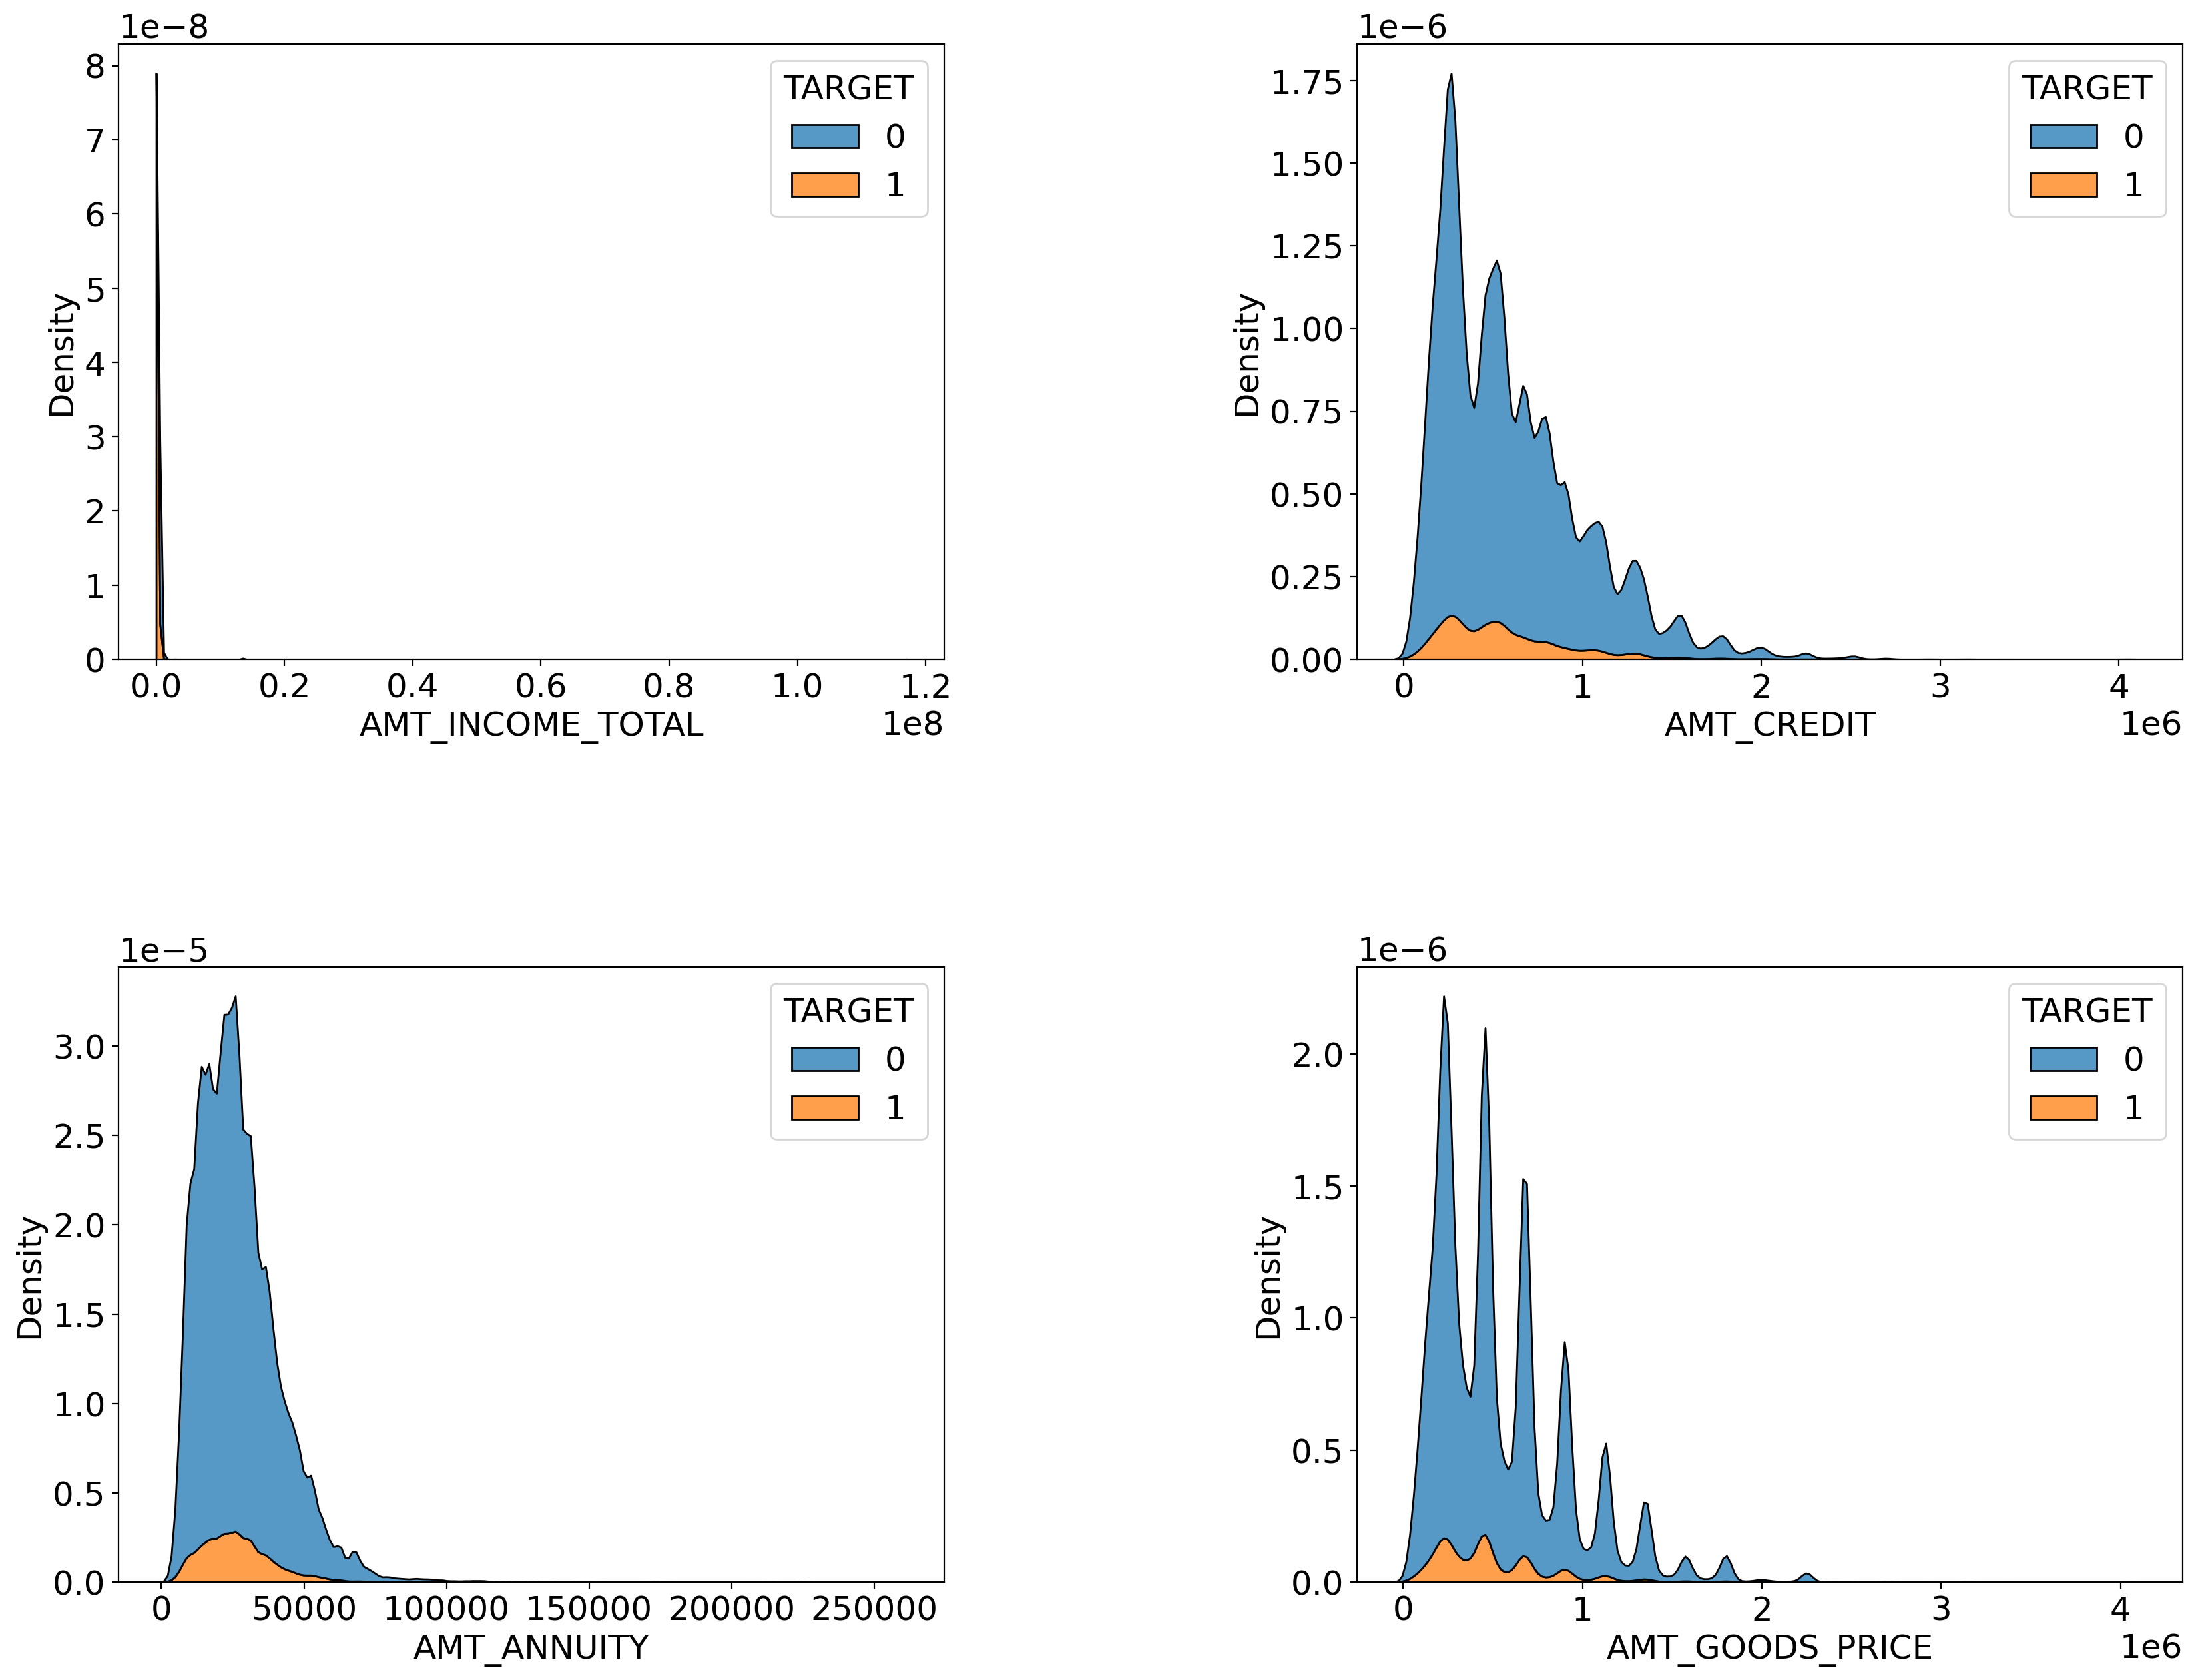

In [103]:
plt.figure(figsize=(20,15),dpi=200)
plt.rcParams.update({'font.size': 18})
for i, col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET',multiple="stack")
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

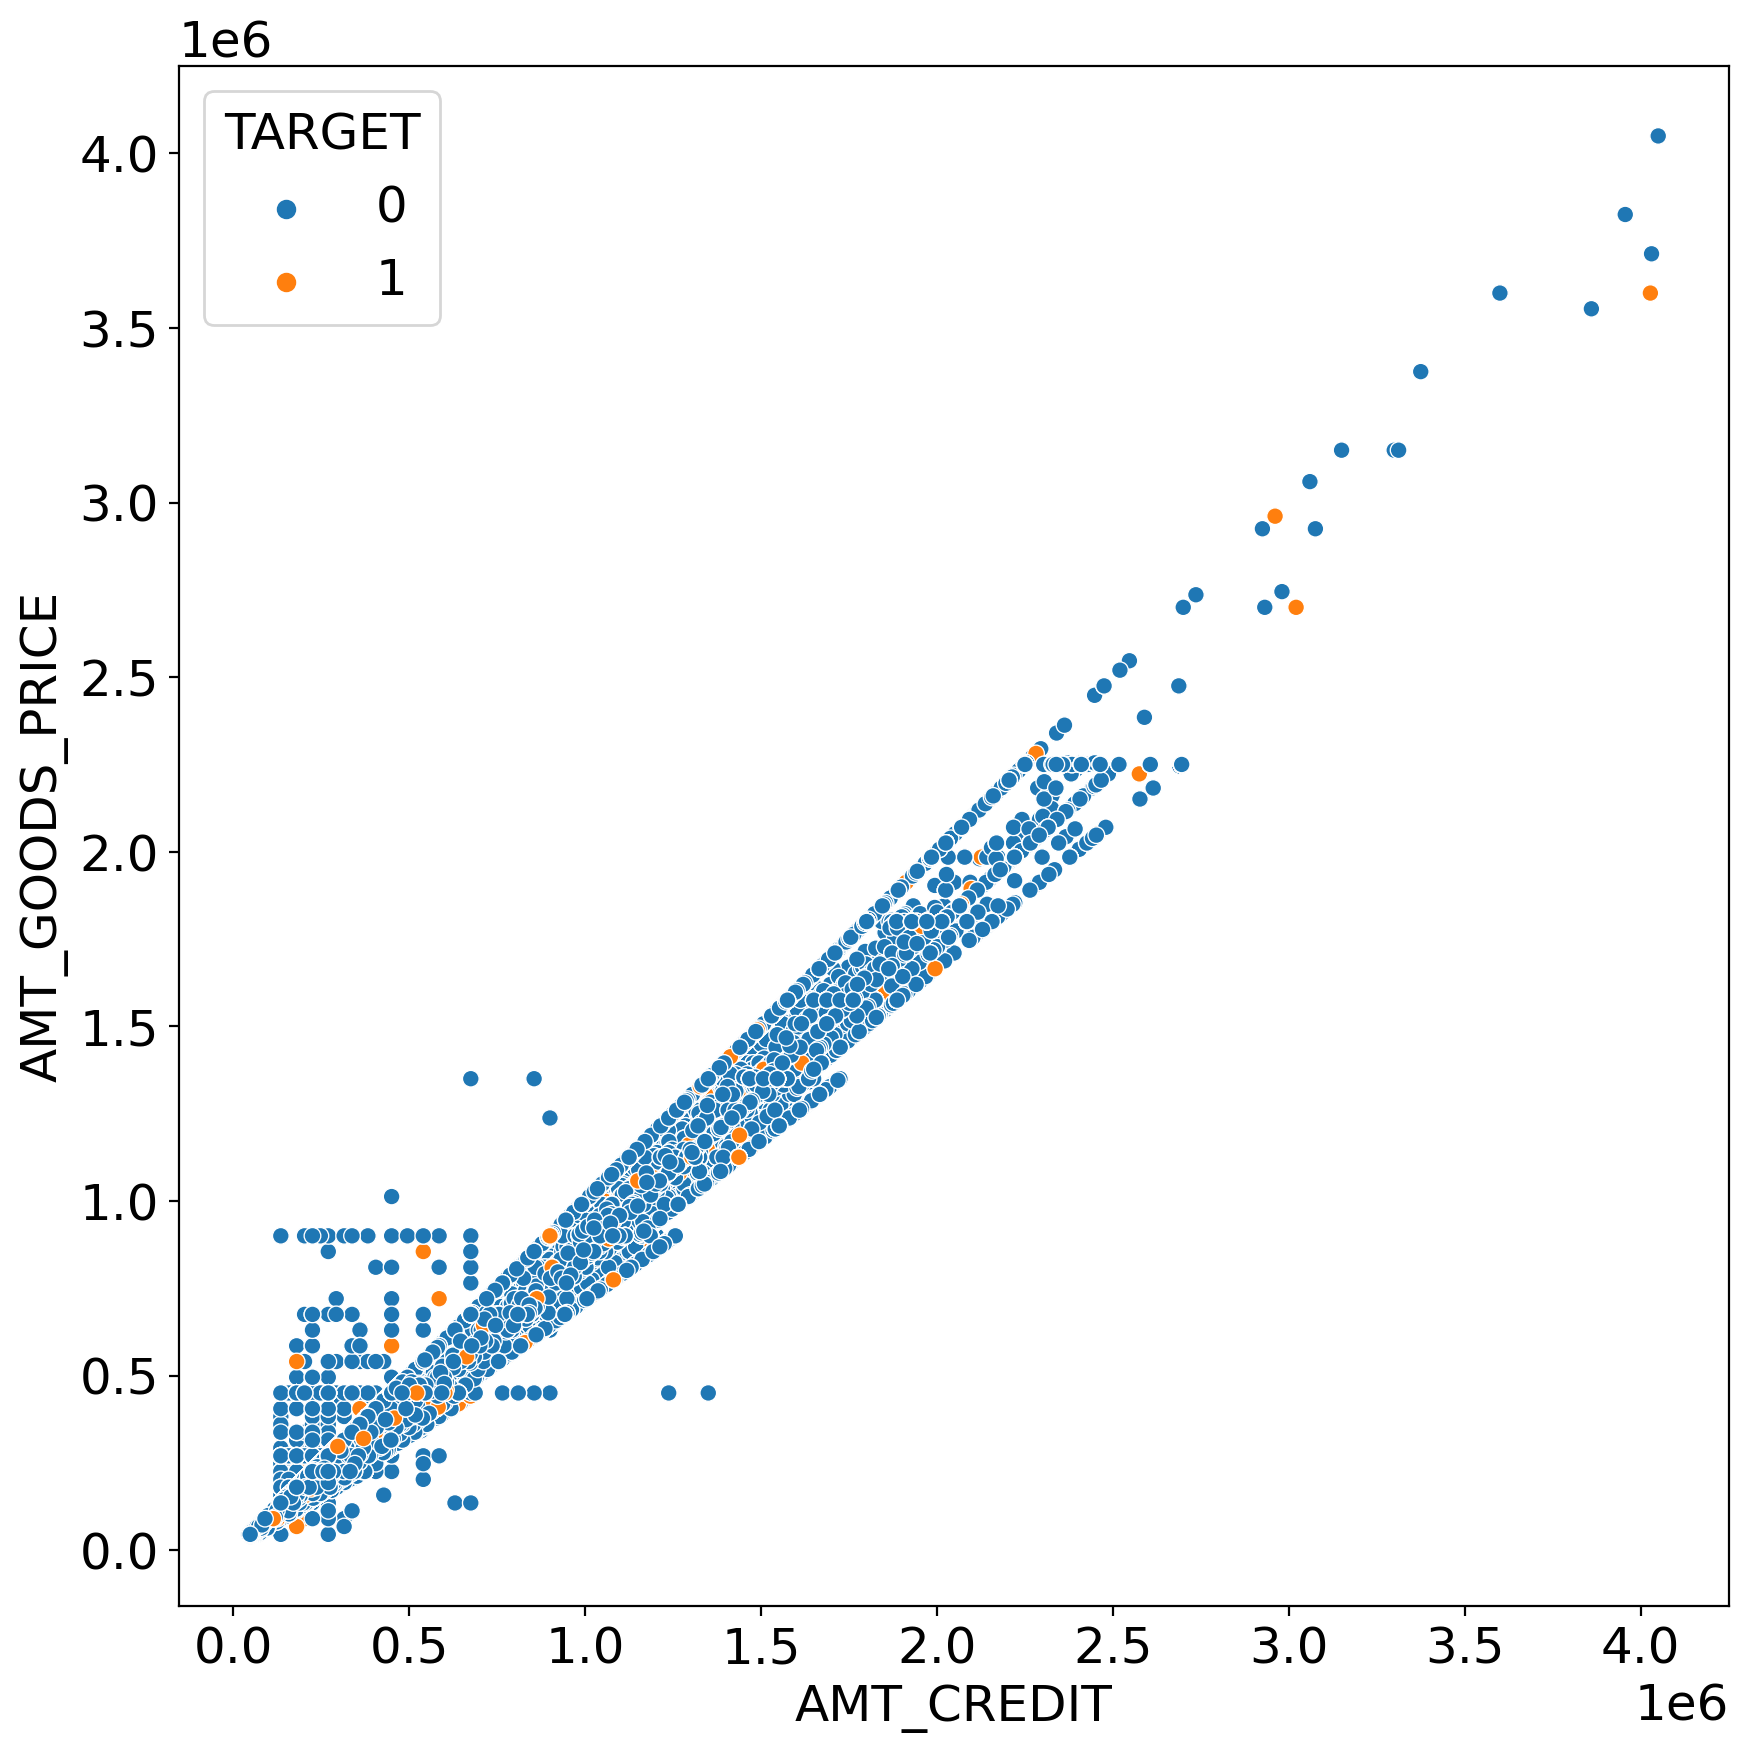

In [104]:
plt.figure(figsize=(10,10),dpi=200)
plt.rcParams.update({'font.size': 18})
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

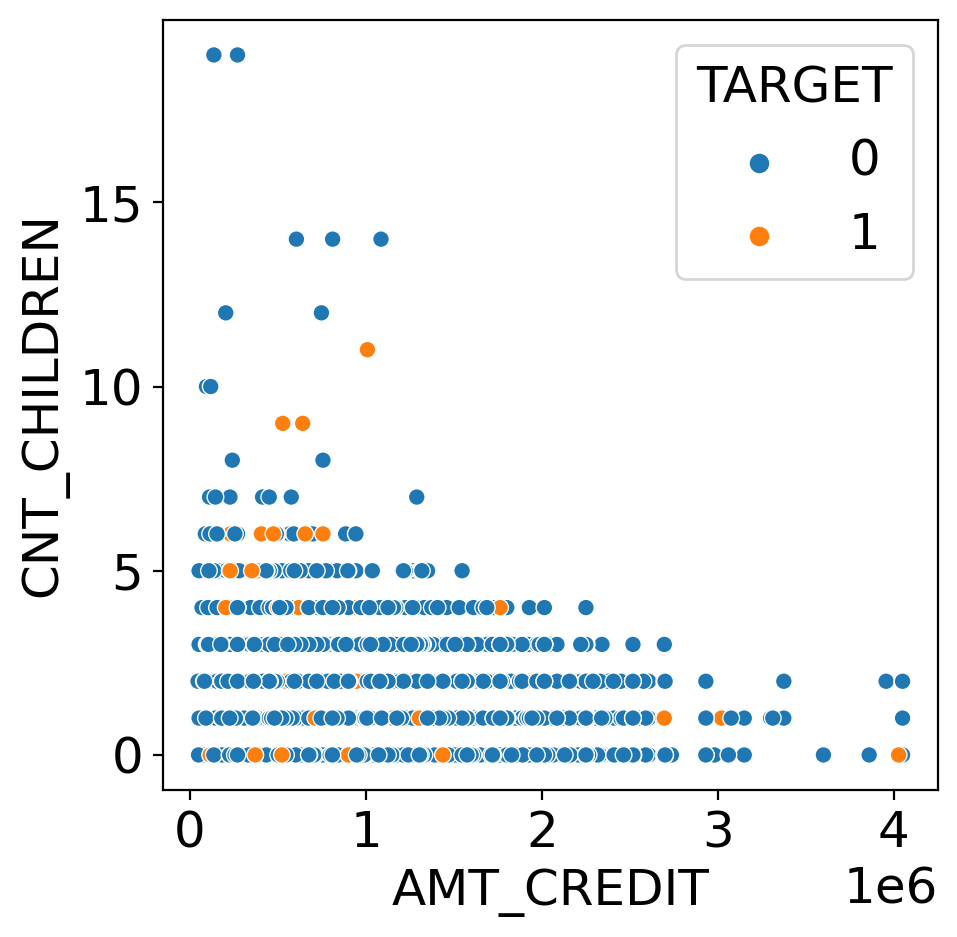

In [105]:
plt.figure(figsize=(5,5),dpi=200)
plt.rcParams.update({'font.size': 18})
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

In [106]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_range,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300-400K,200K-250K,400K-600K,0-25K,0-5Y,20Y-30Y
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100K-200K,0-100K,0-200K,0-25K,0-5Y,50Y-60Y
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,200-300K,100K-150K,200K-400K,25K-50K,5Y-10Y,50Y-60Y
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,500-600K,100K-150K,400K-600K,0-25K,5Y-10Y,50Y-60Y


In [107]:
amount_dat = num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]


<Figure size 5000x5000 with 0 Axes>

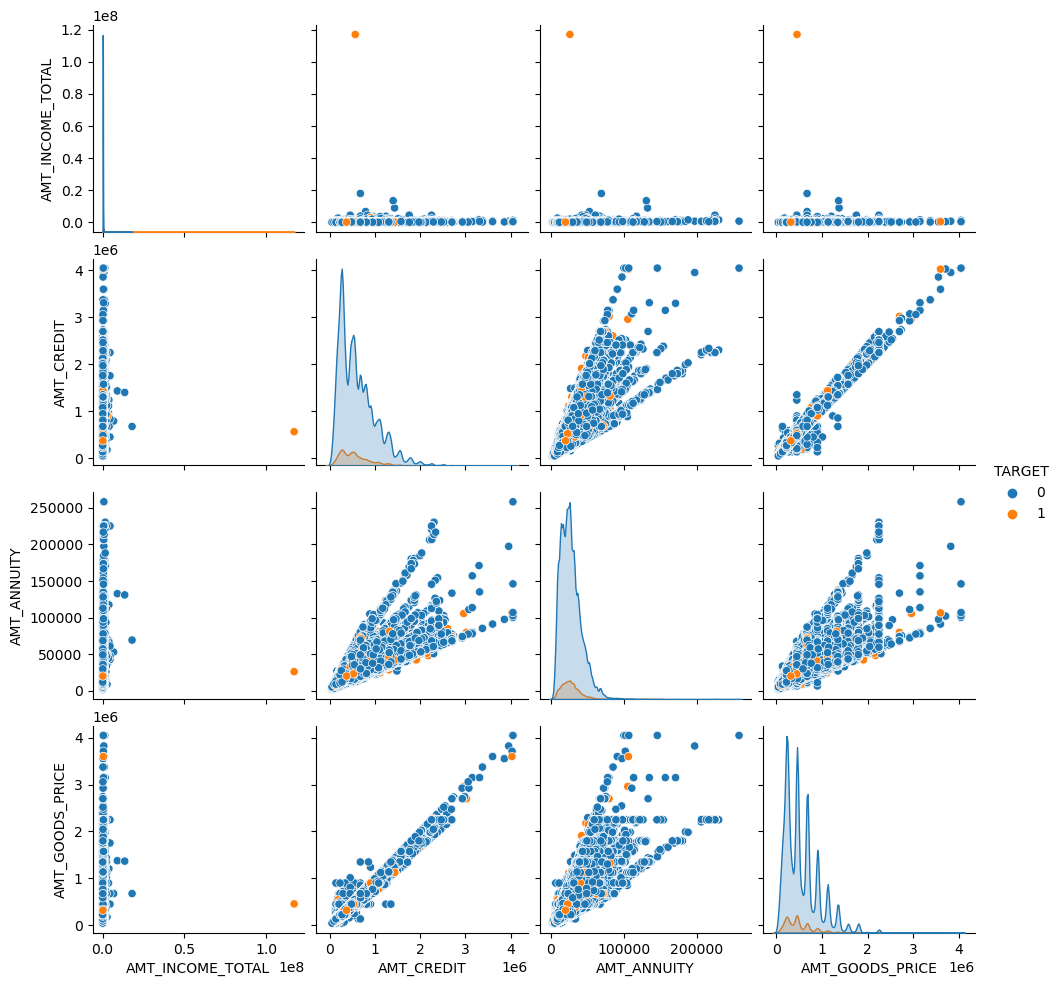

In [108]:
plt.figure(figsize=(25,25),dpi=200)
plt.rcParams.update({'font.size': 10})
sns.pairplot(data=amount_dat,hue='TARGET')

In [109]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var',
                                                                                                                                   0:'count_pct'})

null_count

,var,count_pct
0,RATE_INTEREST_PRIVILEGED,99.643698
1,RATE_INTEREST_PRIMARY,99.643698
2,AMT_DOWN_PAYMENT,53.636480
3,RATE_DOWN_PAYMENT,53.636480
4,NAME_TYPE_SUITE,49.119754
5,NFLAG_INSURED_ON_APPROVAL,40.298129
6,DAYS_TERMINATION,40.298129
7,DAYS_LAST_DUE,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,40.298129
9,DAYS_FIRST_DUE,40.298129


In [110]:
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [111]:
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(nva_cols)

15

In [112]:
len(prev_app.columns)

37

In [113]:
prev_app_nva_col_rmvd = prev_app.drop(labels=nva_cols,axis=1)
len(prev_app_nva_col_rmvd.columns)

22

In [114]:
prev_app_nva_col_rmvd.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [115]:
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [116]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app_nva_col_rmvd.shape[0]*100


AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [117]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [118]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEDIAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())


In [119]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mean())

In [120]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MODE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mode()[0])

In [121]:
gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

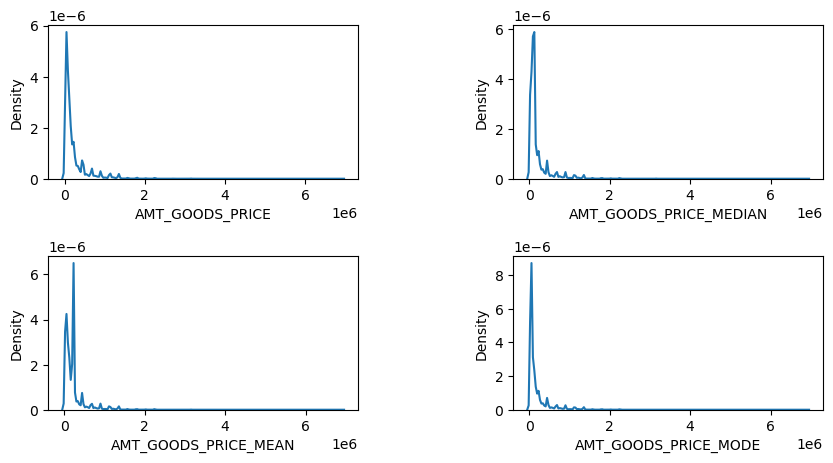

In [122]:
plt.figure(figsize=(10,5))

for i, col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_nva_col_rmvd,x=col,palette='inferno_r')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [123]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()


0

In [124]:
prev_app_nva_col_rmvd['AMT_ANNUITY'].agg(func=['mean','median','max'])

mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [125]:
prev_app_nva_col_rmvd['AMT_ANNUITY'] = prev_app_nva_col_rmvd['AMT_ANNUITY'].fillna(prev_app_nva_col_rmvd['AMT_ANNUITY'].median())

In [126]:
prev_app_nva_col_rmvd['PRODUCT_COMBINATION'] = prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].fillna(prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].mode()[0])


In [127]:
prev_app_nva_col_rmvd['CNT_PAYMENT'].agg(func=['mean','median','max'])


mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [128]:
prev_app_nva_col_rmvd[prev_app_nva_col_rmvd['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [129]:
prev_app_nva_col_rmvd['CNT_PAYMENT'] = prev_app_nva_col_rmvd['CNT_PAYMENT'].fillna(0)

In [130]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)


AMT_CREDIT                1
SK_ID_PREV                0
NAME_GOODS_CATEGORY       0
AMT_GOODS_PRICE_MEAN      0
AMT_GOODS_PRICE_MEDIAN    0
PRODUCT_COMBINATION       0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_CLIENT_TYPE          0
SK_ID_CURR                0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
AMT_GOODS_PRICE_MODE      0
dtype: int64

In [131]:
prev_app_nva_col_rmvd = prev_app_nva_col_rmvd.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1)

In [132]:
len(prev_app_nva_col_rmvd.columns)

22

In [133]:
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [149]:
prev_app_nva_col_rmvd.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [150]:
app_ext_rmvd.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY',

In [134]:
merged_df = pd.merge(app_ext_rmvd,prev_app_nva_col_rmvd,how='inner',on='SK_ID_CURR')
merged_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_range,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300-400K,200K-250K,400K-600K,0-25K,0-5Y,20Y-30Y,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100K-200K,0-100K,0-200K,0-25K,0-5Y,50Y-60Y,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


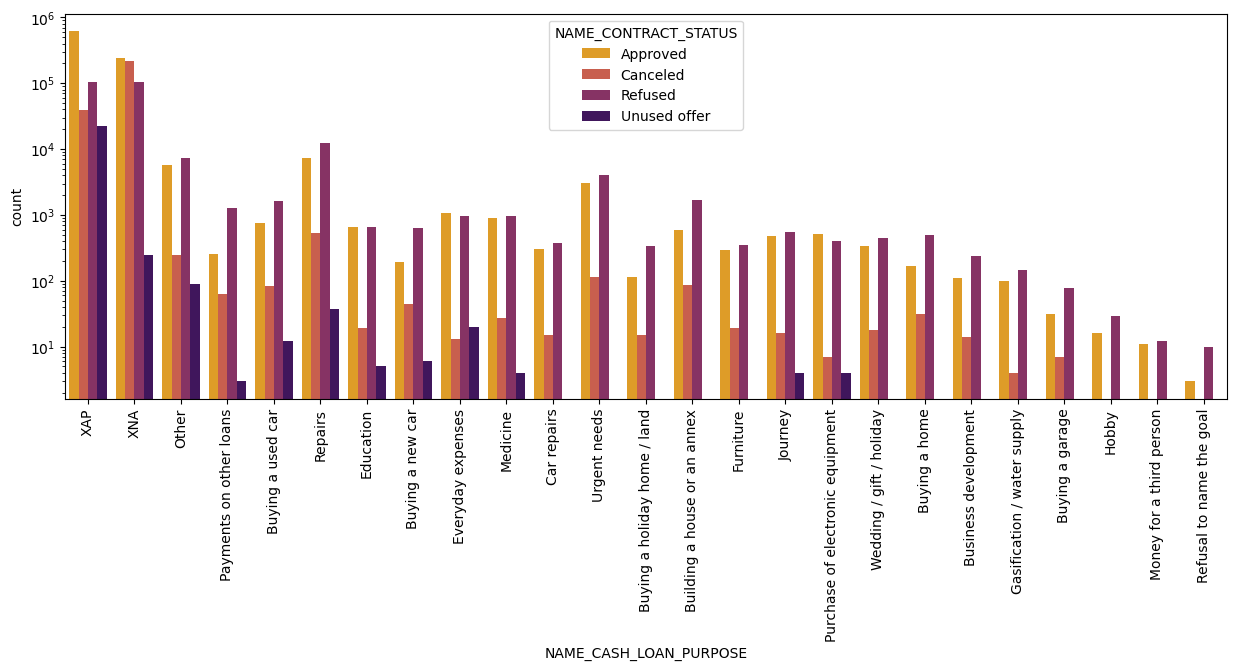

In [135]:
plt.figure(figsize=(15,5))

sns.countplot(data=merged_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',palette='inferno_r')
plt.xticks(rotation=90)
plt.yscale('log')

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

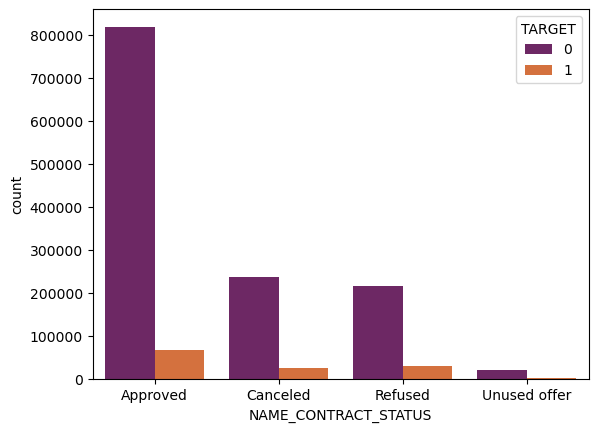

In [136]:
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET',palette='inferno')

In [137]:
merged_agg = merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
merged_agg

,NAME_CONTRACT_STATUS,TARGET,counts
0,Approved,0,818856
1,Approved,1,67243
2,Canceled,0,235641
3,Canceled,1,23800
4,Refused,0,215952
5,Refused,1,29438
6,Unused offer,0,20892
7,Unused offer,1,1879


In [138]:
sum_df  = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()
sum_df

,NAME_CONTRACT_STATUS,counts
0,Approved,886099
1,Canceled,259441
2,Refused,245390
3,Unused offer,22771


In [139]:
merged_agg_2 = pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00
5,Refused,1,29438,245390,12.00
6,Unused offer,0,20892,22771,91.75
7,Unused offer,1,1879,22771,8.25


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

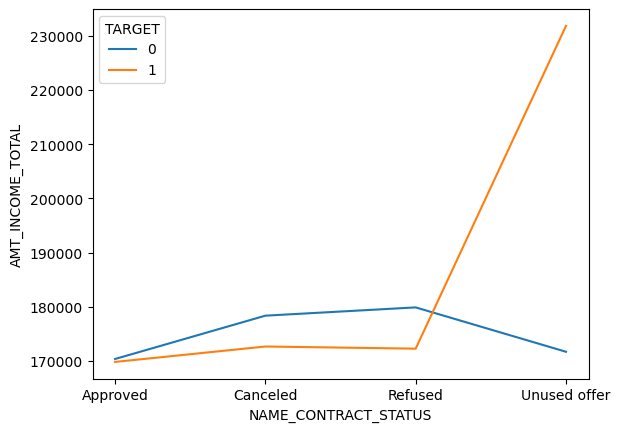

In [140]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')

# Insights

## ========== Categorical Variables Analysis ==========

### Contract Type -

- Most of the customers have taken cash loans and customers who have taken cash loans are less likely to default.

### Gender - 

- Most of the loans have been taken by female customers and default rate for females are just ~7% which is safer and lesser than male.

### Suite Type - 

- Unacompanied people had tanke most of the loans and the default rate is ~8.5% which is still okay.

### Income Type - 

- The safest segments are working, commercial associates and pensioners.

### Education Type - 

- Higher education is the safest segment to give the loan with a default rate of less than 5%.

### Family Status - 

- Married people are safe to target, default rate is 8%.

 
### Housing Type - 

- People having house/appartment are safe to give the loan with default rate of ~8%.

### Occupation Type - 

- Low-Skill Laboreres and drivers are highest defaulters.
- Accountants are less defaulters.
- Core staff, Managers and Laborers are safer to target with a default rate of <= 7.5 to 10%.

### Organisation Type - 

- Transport type 3 contains highest defaulters.
- Others, Business Entity Type 3, Self Employed are good to go with default rate around 10 %.
# 
# ======= Univariate Numeric Variables Analysis ========


#### - Most of the loans were given for the goods price ranging between 0 to 1 ml
#### - Most of the loans were given for the credit amount of 0 to 1 ml
#### - Most of the customers are paying annuity of 0 to 50 K
#### - Mostly the customers have income between 0 to 1 ml
# 
# ========== Bivariate Analysis ==========


#### - AMT_CREDIT and AMT_GOODS_PRICE are linearly corelated, if the AMT_CREDIT increases the defaulters are decreasing
#### - People having income less than or equals to 1 ml, are more like to take loans out of which who are taking loan of less than 1.5     million, coudl turn out to be defaulters. we can target income below 1 million and loan maount greater than 1.5 million

#### - People having children 1 to less than 5 are safer to give the loan
#### - People who can pay the annuity of 100K are more like to get the loan and that's upto less than 2ml (safer segment)
# 
# ============ Analysis on Merged Data==============


#### - For the repairing purpose customers had applied mostly prev. and the same puspose has most number of cancelations.
#### - Most of the app. which were prev. either canceled or refused 80-90% of them are repayer in the current data.
#### - Offers which were unused prev. now have maximum number of defaulters despite of having high income band customers.
# 

# ========== Final Conclusion/Insights ==========

### Bank should target the customers

#### - Having low income i.e. below 1 ml
#### - Working in Others, Business Entity Type 3, Self Employed  org. type
#### - Working as Accountants, Core staff, Managers and Laborers 
#### - Having house/appartment and are married and having children not more than 5
#### - Highly educated
#### - Preferably female
#### - Unacompanied people can be safer
# 
# ========== Amount segment recommended ==========


#### - The credit amount should not be more than 1 ml
#### - Annuity can be made of 50K (depending on the eligibility)
#### - Income bracket could be below 1 ml
#### - 80-90% of the customer who were prev. canceled/refused, are repayers. Bank can do the analysis and can consider to give loan to these segments
# 

# ========== Precautions ==========
#### - Org. Transport type 3 should be avoided
#### - Low-Skill Laboreres and drivers  should be avoided
#### - Offers prev. unused and high income customer should be avoided
# 

In [141]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_range,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300-400K,200K-250K,400K-600K,0-25K,0-5Y,20Y-30Y,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100K-200K,0-100K,0-200K,0-25K,0-5Y,50Y-60Y,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [142]:
merged_df.shape

(1413701, 70)

In [166]:
merged_df.columns.sort_values()

Index(['AMT_ANNUITY_RANGE', 'AMT_ANNUITY_x', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_RANGE', 'AMT_CREDIT_x', 'AMT_CREDIT_y',
       'AMT_GOODS_PRICE_range', 'AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y',
       'AMT_INCOME_TOTAL', 'AMT_INCOME_TOTAL_RANGE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CHANNEL_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CNT_PAYMENT',
       'CODE_GENDER', 'CODE_REJECT_REASON', 'DAYS_BIRTH', 'DAYS_BIRTH_RANGE',
       'DAYS_DECISION', 'DAYS_EMPLOYED', 'DAYS_EMPLOYED_RANGE',
       'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'HOUR_APPR_PROCESS_START', 'LIVE_CITY_NOT_WORK_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CO

## Encoding the Data

In [143]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Select the target column for encoding
CODE_GENDER = 'CODE_GENDER'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[CODE_GENDER] = label_encoder.fit_transform(merged_df[CODE_GENDER])

# Verify the encoding
print(merged_df[CODE_GENDER].value_counts())

0    955139
1    458507
2        55
Name: CODE_GENDER, dtype: int64


In [146]:
# Select the target column for encoding
NAME_CONTRACT_TYPE = 'NAME_CONTRACT_TYPE_x'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_CONTRACT_TYPE] = label_encoder.fit_transform(merged_df[NAME_CONTRACT_TYPE])

# Verify the encoding
print(merged_df[NAME_CONTRACT_TYPE].value_counts())

0    1307115
1     106586
Name: NAME_CONTRACT_TYPE_x, dtype: int64


In [176]:
# Select the target column for encoding
NAME_CONTRACT_TYPE_y = 'NAME_CONTRACT_TYPE_y'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_CONTRACT_TYPE_y] = label_encoder.fit_transform(merged_df[NAME_CONTRACT_TYPE_y])

# Verify the encoding
print(merged_df[NAME_CONTRACT_TYPE_y].value_counts())

0    626764
1    625256
2    161368
3       313
Name: NAME_CONTRACT_TYPE_y, dtype: int64


In [152]:
# Select the target column for encoding
NAME_CONTRACT_STATUS = 'NAME_CONTRACT_STATUS'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_CONTRACT_STATUS] = label_encoder.fit_transform(merged_df[NAME_CONTRACT_STATUS])

# Verify the encoding
print(merged_df[NAME_CONTRACT_STATUS].value_counts())

0    886099
1    259441
2    245390
3     22771
Name: NAME_CONTRACT_STATUS, dtype: int64


In [153]:
# Select the target column for encoding
NAME_TYPE_SUITE = 'NAME_TYPE_SUITE'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_TYPE_SUITE] = label_encoder.fit_transform(merged_df[NAME_TYPE_SUITE])

# Verify the encoding
print(merged_df[NAME_TYPE_SUITE].value_counts())

6    1157904
1     184261
5      46652
0      13906
4       6735
3       3020
2       1223
Name: NAME_TYPE_SUITE, dtype: int64


In [154]:
# Select the target column for encoding
NAME_INCOME_TYPE = 'NAME_INCOME_TYPE'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_INCOME_TYPE] = label_encoder.fit_transform(merged_df[NAME_INCOME_TYPE])

# Verify the encoding
print(merged_df[NAME_INCOME_TYPE].value_counts())

6    724089
0    321481
2    273544
3     94424
5       123
4        24
1        16
Name: NAME_INCOME_TYPE, dtype: int64


In [156]:
# Select the target column for encoding
NAME_EDUCATION_TYPE = 'NAME_EDUCATION_TYPE'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_EDUCATION_TYPE] = label_encoder.fit_transform(merged_df[NAME_EDUCATION_TYPE])

# Verify the encoding
print(merged_df[NAME_EDUCATION_TYPE].value_counts())

4    1037902
1     312845
2      45211
3      17164
0        579
Name: NAME_EDUCATION_TYPE, dtype: int64


In [157]:
# Select the target column for encoding
NAME_FAMILY_STATUS = 'NAME_FAMILY_STATUS'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_FAMILY_STATUS] = label_encoder.fit_transform(merged_df[NAME_FAMILY_STATUS])

# Verify the encoding
print(merged_df[NAME_FAMILY_STATUS].value_counts())

1    910910
3    186657
0    143157
2     91338
4     81639
Name: NAME_FAMILY_STATUS, dtype: int64


In [158]:
# Select the target column for encoding
NAME_HOUSING_TYPE = 'NAME_HOUSING_TYPE'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_HOUSING_TYPE] = label_encoder.fit_transform(merged_df[NAME_HOUSING_TYPE])

# Verify the encoding
print(merged_df[NAME_HOUSING_TYPE].value_counts())

1    1264952
5      61614
2      51533
4      19785
3      11428
0       4389
Name: NAME_HOUSING_TYPE, dtype: int64


In [159]:
# Select the target column for encoding
OCCUPATION_TYPE = 'OCCUPATION_TYPE'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[OCCUPATION_TYPE] = label_encoder.fit_transform(merged_df[OCCUPATION_TYPE])

# Verify the encoding
print(merged_df[OCCUPATION_TYPE].value_counts())

8     708879
14    151358
3     118272
10     94941
4      84067
6      48483
0      41958
11     39999
16     31702
2      28726
1      24328
12     12238
9       9320
17      6132
15      5738
13      3544
5       2313
7       1703
Name: OCCUPATION_TYPE, dtype: int64


In [160]:
# Select the target column for encoding
WEEKDAY_APPR_PROCESS_START = 'WEEKDAY_APPR_PROCESS_START'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[WEEKDAY_APPR_PROCESS_START] = label_encoder.fit_transform(merged_df[WEEKDAY_APPR_PROCESS_START])

# Verify the encoding
print(merged_df[WEEKDAY_APPR_PROCESS_START].value_counts())

5    248632
6    236197
1    234497
4    230278
0    230247
2    157173
3     76677
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


In [161]:
# Select the target column for encoding
ORGANIZATION_TYPE = 'ORGANIZATION_TYPE'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[ORGANIZATION_TYPE] = label_encoder.fit_transform(merged_df[ORGANIZATION_TYPE])

# Verify the encoding
print(merged_df[ORGANIZATION_TYPE].value_counts())

5     304889
57    273583
42    183106
33     73531
30     52086
4      46399
11     45740
39     39007
51     37252
28     31362
7      29716
3      25478
55     24609
40     15613
20     15247
26     14706
13     13706
47     13666
16     12131
31     11582
46     11112
1      10786
2      10684
34     10346
35     10067
53      9173
41      8432
38      8253
43      7021
24      6118
56      5853
54      5717
14      4511
12      4471
9       4014
21      3958
22      2843
50      2709
27      2409
44      2332
10      2186
19      2051
36      1791
0       1782
17      1593
8       1518
45      1446
32      1342
6       1293
29      1246
52       813
15       572
23       516
37       441
48       323
18       276
49       212
25        82
Name: ORGANIZATION_TYPE, dtype: int64


In [167]:
# Select the target column for encoding
NAME_PAYMENT_TYPE = 'NAME_PAYMENT_TYPE'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_PAYMENT_TYPE] = label_encoder.fit_transform(merged_df[NAME_PAYMENT_TYPE])

# Verify the encoding
print(merged_df[NAME_PAYMENT_TYPE].value_counts())

0    882700
3    522960
2      7100
1       941
Name: NAME_PAYMENT_TYPE, dtype: int64


In [168]:
# Select the target column for encoding
NAME_CLIENT_TYPE = 'NAME_CLIENT_TYPE'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_CLIENT_TYPE] = label_encoder.fit_transform(merged_df[NAME_CLIENT_TYPE])

# Verify the encoding
print(merged_df[NAME_CLIENT_TYPE].value_counts())

2    1037682
0     259540
1     114936
3       1543
Name: NAME_CLIENT_TYPE, dtype: int64


In [169]:
# Select the target column for encoding
NAME_GOODS_CATEGORY = 'NAME_GOODS_CATEGORY'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_GOODS_CATEGORY] = label_encoder.fit_transform(merged_df[NAME_GOODS_CATEGORY])

# Verify the encoding
print(merged_df[NAME_GOODS_CATEGORY].value_counts())

26    797209
18    193743
7     104785
5      89923
2      85502
11     45439
21     21707
6      21356
4      19590
3       6228
15      5188
13      4309
16      3240
24      2854
22      2540
20      2337
12      2322
19      1985
23      1324
17      1302
8        330
10       166
0        109
9         89
25        65
14        58
1          1
Name: NAME_GOODS_CATEGORY, dtype: int64


In [170]:
# Select the target column for encoding
NAME_PORTFOLIO = 'NAME_PORTFOLIO'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_PORTFOLIO] = label_encoder.fit_transform(merged_df[NAME_PORTFOLIO])

# Verify the encoding
print(merged_df[NAME_PORTFOLIO].value_counts())

3    592460
2    391663
4    307213
0    121985
1       380
Name: NAME_PORTFOLIO, dtype: int64


In [171]:
# Select the target column for encoding
NAME_PRODUCT_TYPE = 'NAME_PRODUCT_TYPE'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_PRODUCT_TYPE] = label_encoder.fit_transform(merged_df[NAME_PRODUCT_TYPE])

# Verify the encoding
print(merged_df[NAME_PRODUCT_TYPE].value_counts())

0    900053
2    385394
1    128254
Name: NAME_PRODUCT_TYPE, dtype: int64


In [172]:
# Select the target column for encoding
NAME_SELLER_INDUSTRY = 'NAME_SELLER_INDUSTRY'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_SELLER_INDUSTRY] = label_encoder.fit_transform(merged_df[NAME_SELLER_INDUSTRY])

# Verify the encoding
print(merged_df[NAME_SELLER_INDUSTRY].value_counts())

10    715322
4     341701
2     238350
5      48966
3      25417
1      19896
6      16567
0       4080
7       2107
8        921
9        374
Name: NAME_SELLER_INDUSTRY, dtype: int64


In [173]:
# Select the target column for encoding
NAME_YIELD_GROUP = 'NAME_YIELD_GROUP'  # Replace 'target_column' with your actual target column name

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using label encoding
merged_df[NAME_YIELD_GROUP] = label_encoder.fit_transform(merged_df[NAME_YIELD_GROUP])

# Verify the encoding
print(merged_df[NAME_YIELD_GROUP].value_counts())

0    429198
4    324971
1    306061
3    274884
2     78587
Name: NAME_YIELD_GROUP, dtype: int64


In [175]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Display the first five rows with all columns
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_range,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,6,4,3,1,0.018801,9461,637,3648.0,2120,8,1.0,2,2,6,10,0,0,0,0,0,0,5,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300-400K,200K-250K,400K-600K,0-25K,0-5Y,20Y-30Y,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,0,-606,3,XAP,0,24,3,0,Stone,500,0,24.0,3,POS other with interest
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,3,1,1,1,0.003541,16765,1188,1186.0,291,3,2.0,1,1,1,11,0,0,0,0,0,0,39,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,0,-746,3,XAP,2,26,2,2,Credit and cash offices,-1,10,12.0,3,Cash X-Sell: low
2,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,3,1,1,1,0.003541,16765,1188,1186.0,291,3,2.0,1,1,1,11,0,0,0,0,0,0,39,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,0,-828,0,XAP,1,11,3,0,Stone,1400,5,6.0,4,POS industry with interest
3,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,3,1,1,1,0.003541,16765,1188,1186.0,291,3,2.0,1,1,1,11,0,0,0,0,0,0,39,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900K,250K-300K,1M-2M,25K-50K,0-5Y,40Y-50Y,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,0,-2341,0,XAP,1,7,3,0,Country-wide,200,4,12.0,4,POS household with interest
4,100004,0,1,1,0,67500.0,135000.0,6750.0,135000.0,6,6,4,3,1,0.010032,19046,225,4260.0,2531,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100K-200K,0-100K,0-200K,0-25K,0-5Y,50Y-60Y,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,0,-815,0,XAP,0,18,3,0,Regional / Local,30,2,4.0,4,POS mobile without interest


### Using Decision Tree Classification

In [183]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

Columns = ['CODE_GENDER','NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y','NAME_CONTRACT_STATUS','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']

# Separate features and target variable
X = merged_df[Columns]  # Replace 'target_column' with your actual target column name
y = merged_df['TARGET']

# Split the merged_df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print('Recall:', recall)

Accuracy: 0.8962760972055698
Precision: 0.37241595322614324
Recall: 0.2919104709685339


In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Removed Organisation type, Weekday and Goods Category column
Columns_edited = ['CODE_GENDER','NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y','NAME_CONTRACT_STATUS','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']

# Separate features and target variable
X = merged_df[Columns] # Replace 'TARGET' with your actual target column name
y = merged_df['TARGET']

# Split the merged_df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = clf.predict(X_train)

# Make predictions on the test set
test_predictions = clf.predict(X_test)

# Calculate accuracy, precision, and recall on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)

# Calculate accuracy, precision, and recall on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)

print('Training Set Accuracy:', train_accuracy)
print('Training Set Precision:', train_precision)
print('Training Set Recall:', train_recall)

print('Test Set Accuracy:', test_accuracy)
print('Test Set Precision:', test_precision)
print('Test Set Recall:', test_recall)

Training Set Accuracy: 0.9286305439626512
Training Set Precision: 0.9152673978452878
Training Set Recall: 0.1927833997751201
Test Set Accuracy: 0.9067096742248206
Test Set Precision: 0.3430756159728122
Test Set Recall: 0.08230737871993478


In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

predictions = clf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    258193
           1       0.34      0.08      0.13     24548

    accuracy                           0.91    282741
   macro avg       0.63      0.53      0.54    282741
weighted avg       0.87      0.91      0.88    282741



### Using Random Forest Classification

In [192]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Separate features and target variable
X = merged_df[Columns_edited]  # Replace 'TARGET' with your actual target column name
y = merged_df['TARGET']

# Split the merged_df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of the Random Forest classifier
clf = RandomForestClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = clf.predict(X_train)

# Make predictions on the test set
test_predictions = clf.predict(X_test)

# Calculate accuracy, precision, and recall on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)

# Calculate accuracy, precision, and recall on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)

print('Training Set Accuracy:', train_accuracy)
print('Training Set Precision:', train_precision)
print('Training Set Recall:', train_recall)

print('Test Set Accuracy:', test_accuracy)
print('Test Set Precision:', test_precision)
print('Test Set Recall:', test_recall)

Training Set Accuracy: 0.9286544174860296
Training Set Precision: 0.873841015951136
Training Set Recall: 0.203533120445427
Test Set Accuracy: 0.9112933745017525
Test Set Precision: 0.4462977002779884
Test Set Recall: 0.07162556781310837
